In [60]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [61]:
import warnings 
warnings.filterwarnings("ignore") 

In [62]:
# Loading dataset
df = pd.read_csv("Iris.csv")
df.shape

(150, 6)

In [63]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
df=df.drop(['Id'], axis=1)

In [65]:
print (df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Checking wether the dataset is balanced or not

In [66]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

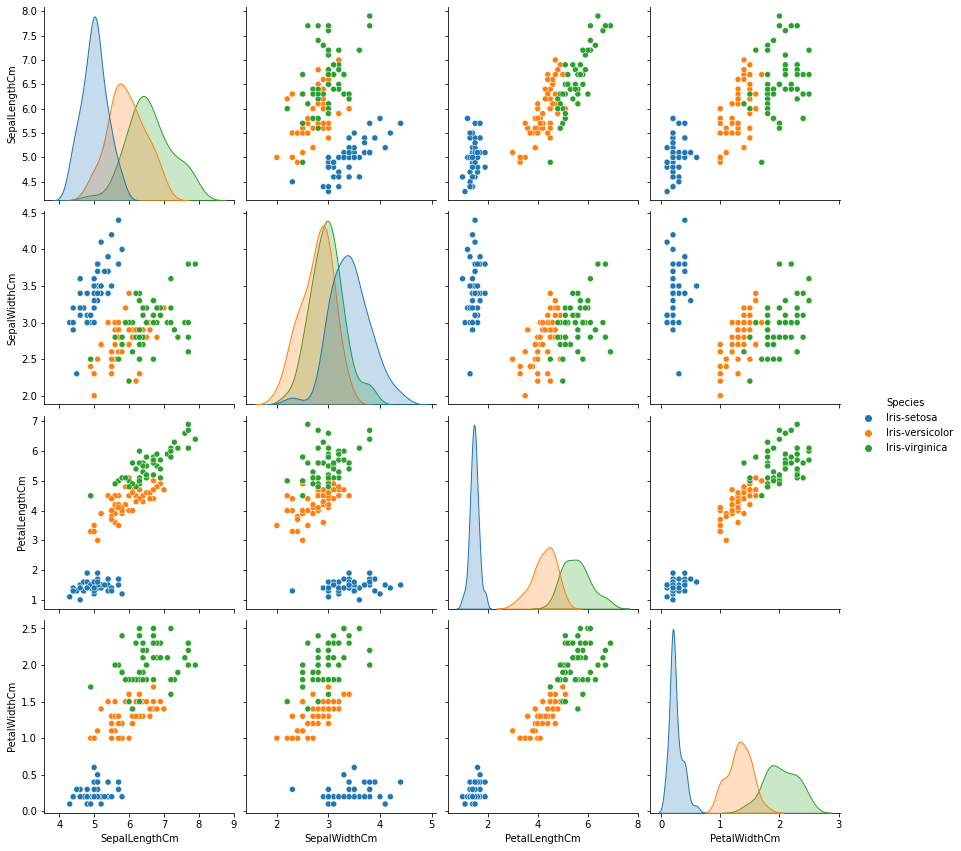

In [67]:
sns.pairplot(df, hue="Species", size=3)

Looking at the graphs, PetalLengthCm and PetalWidthCm looks like they are the most useful features to identify various flower types.

In [68]:
#Checking for null values in dataset
df.isnull().value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
False          False         False          False         False      150
dtype: int64

#### Considering all the 4 features

In [69]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df["Species"]

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [71]:
from sklearn import tree

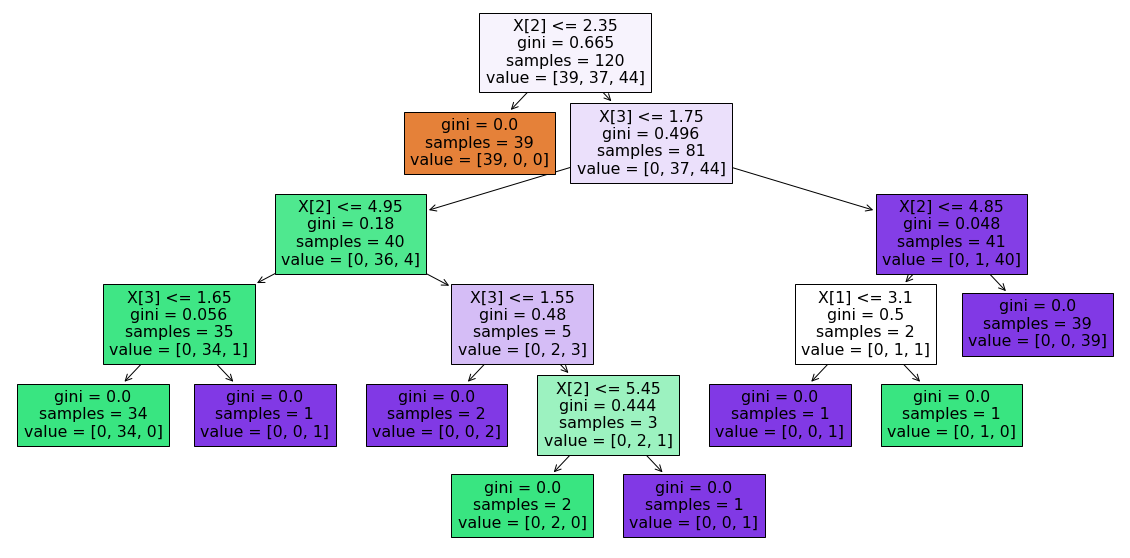

In [72]:
considering_4_features= tree.DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize = (20,10))
tree.plot_tree(considering_4_features, filled=True)
plt.show()

In [73]:
predictions=considering_4_features.predict(X_test)

In [74]:
list(zip(predictions[:5],y_test[:5]))

[('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa')]

In [75]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, predictions))

1.0


#### Considering 2 most important features

In [76]:
X=df[['PetalLengthCm', 'PetalWidthCm']]
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
considering_2_features= tree.DecisionTreeClassifier().fit(X_train, y_train)

In [77]:
predictions=considering_2_features.predict(X_test)
list(zip(predictions[:5],y_test[:5]))

[('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa')]

In [78]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, predictions))

0.9666666666666667


Conclusion: When I considered all the 4 features I got an accuracy of 1 whereas when I considered 2 most important features I got an accuracy of 0.966